In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

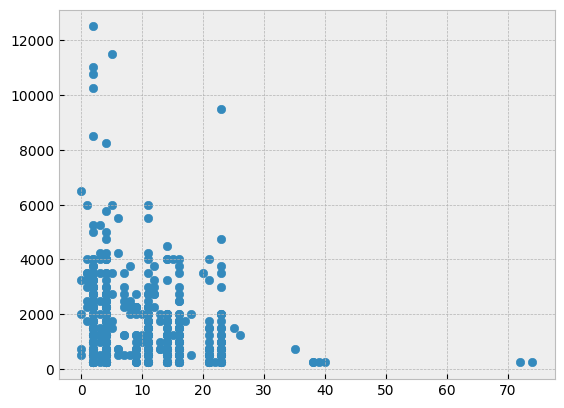

In [35]:
# Import dataset
data = pd.read_csv('transfusion.data')
plt.plot()
plt.scatter(data['recency'], data['monetary']) #2 fitur yang akan dipakai
plt.show()

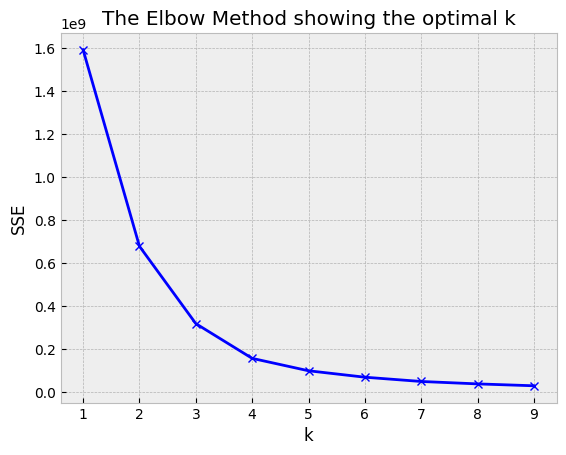

In [36]:
X = np.array(list(zip(data['recency'], data['monetary']))).reshape(len(data['recency']), 2)
sse = []
for k in range(1, 10):
 kmeans = KMeans(n_clusters=k).fit(X)
 sse.append(kmeans.inertia_)
plt.plot(range(1, 10), sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

[[1.09976134e+01 5.31622912e+02]
 [6.90526316e+00 3.62631579e+03]
 [5.25000000e+00 1.02812500e+04]
 [7.98672566e+00 1.68915929e+03]]


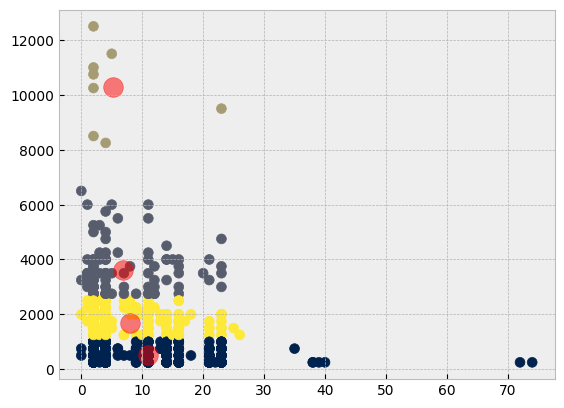

In [37]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='cividis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [38]:
import pickle

# Menyimpan model ke dalam file pickle
with open('centroids.pkl', 'wb') as f:
    pickle.dump(centroids, f)
    print('Centroids tersimpan ke dalam file pickle')

Centroids tersimpan ke dalam file pickle
